In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [72]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline

iris = pd.read_csv("Iris.csv")
iris.head(10)

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [7]:
iris.describe(include='all').transpose()
iris.fillna(iris.median(), inplace=True)
iris.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
petal length,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
petal width,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
iris,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [9]:
iris['iris'] = pd.factorize(iris.iris)[0]
iris.head(10)

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [10]:
print(iris.corr())
# all 4 independent varaibles has very high co relation with dependent varaible. So no field will be dropped

              sepal length  sepal width  petal length  petal width      iris
sepal length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal width       0.817954    -0.356544      0.962757     1.000000  0.956464
iris              0.782561    -0.419446      0.949043     0.956464  1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [14]:
import pandas as pd
import numpy as np
iris.var()
# again variance is > 10% for all fields no need to drop

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
iris            0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C10606438>,
      dtype=object)

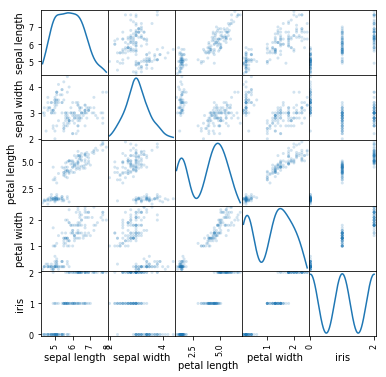

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [57]:
from sklearn.model_selection import train_test_split
X = iris.drop("iris" , axis=1)

y = iris.pop("iris")    

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_set,train_labels)
knn.predict(test_set)
knn.score(test_set, test_labels)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_set,train_labels)
knn.predict(test_set)
knn.score(test_set, test_labels)

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(train_set,train_labels)
knn.predict(test_set)
knn.score(test_set, test_labels)

0.9666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [27]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 19,2)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
knn_gscv.best_params_


{'n_neighbors': 7}

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [33]:
from sklearn.model_selection import cross_val_score

myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_set, train_labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
    MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]


# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

TypeError: 'filter' object is not subscriptable

# Naive Bayes with Iris Data

In [34]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
X = iris.drop("iris" , axis=1)

y = iris.pop("iris") 

In [35]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: iris, Length: 150, dtype: int64
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6      

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [43]:
iris["iris"].value_counts()
freq = iris['iris'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,iris,count,prop
0,Iris-versicolor,50,0.333333
1,Iris-setosa,50,0.333333
2,Iris-virginica,50,0.333333


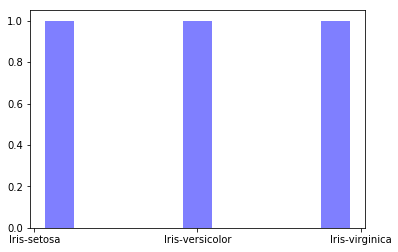

In [58]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 

num_bins = 3
n, bins, patches = plt.hist(y, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [0]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [59]:
print(iris.corr())
# all features are highly co related 

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


### Split data in Training and test set in 80:20.

In [73]:
from sklearn.model_selection import train_test_split
X = iris.drop("iris" , axis=1)

y = iris.pop("iris")    

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

In [63]:
df_z = iris.apply(zscore)
df_z.shape

(150, 4)

### Question 14 
Train and Fit NaiveBayes Model

In [74]:
#Fit the model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)


GaussianNB(priors=None)

In [75]:
#Predict
predicted= model.predict

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [76]:
# show Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y, predicted))

TypeError: Expected sequence or array-like, got <class 'method'>

In [0]:
# show accuracy

In [0]:
#Show precision and Recall metrics

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779